<a href="https://colab.research.google.com/github/MithunKiniStar/Time-Series-Forecasting/blob/main/UnivariateTimeSeries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten

In [10]:
# preparing independent and dependent features
def prepare_data(timeseries_data, n_features):
	X, y =[],[]
	for i in range(len(timeseries_data)):
		# find the end of this pattern
		end_ix = i + n_features
		# check if we are beyond the sequence
		if end_ix > len(timeseries_data)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = timeseries_data[i:end_ix], timeseries_data[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return np.array(X), np.array(y)

In [11]:
# define input sequence
timeseries_data = [110, 125, 133, 146, 158, 172, 187, 196, 210]
# choose a number of time steps
n_steps = 3
# split into samples
X, y = prepare_data(timeseries_data, n_steps)

In [12]:
print(X),print(y)

[[110 125 133]
 [125 133 146]
 [133 146 158]
 [146 158 172]
 [158 172 187]
 [172 187 196]]
[146 158 172 187 196 210]


(None, None)

In [13]:
X.shape

(6, 3)

In [14]:
# reshape from [samples, timesteps] into [samples, timesteps, features] to make it three dimension array
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))

### Building LSTM Model

In [15]:
# define model
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X, y, epochs=300, verbose=0)

### Predicting For the next 10 data

In [17]:
# demonstrate prediction for next 10 days
import numpy as np

x_input = np.array([187, 196, 210])
temp_input=list(x_input)
lst_output=[]
i=0
while(i<10):
    
    if(len(temp_input)>3):
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        #print(x_input)
        x_input = x_input.reshape((1, n_steps, n_features))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.append(yhat[0][0])
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.append(yhat[0][0])
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps, n_features))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.append(yhat[0][0])
        lst_output.append(yhat[0][0])
        i=i+1
    

print(lst_output)

[222.92088]
1 day input [196.         210.         222.92088318]
1 day output [[234.47226]]
2 day input [210.         222.92088318 234.47225952]
2 day output [[248.07356]]
3 day input [222.92088 234.47226 248.07356]
3 day output [[261.07388]]
4 day input [234.47226 248.07356 261.07388]
4 day output [[273.99692]]
5 day input [248.07356 261.07388 273.99692]
5 day output [[287.91965]]
6 day input [261.07388 273.99692 287.91965]
6 day output [[301.7223]]
7 day input [273.99692 287.91965 301.7223 ]
7 day output [[315.87192]]
8 day input [287.91965 301.7223  315.87192]
8 day output [[330.6629]]
9 day input [301.7223  315.87192 330.6629 ]
9 day output [[345.66373]]
[222.92088, 234.47226, 248.07356, 261.07388, 273.99692, 287.91965, 301.7223, 315.87192, 330.6629, 345.66373]


In [18]:
timeseries_data

[110, 125, 133, 146, 158, 172, 187, 196, 210]

In [19]:
len(timeseries_data)

9

In [20]:
lst_output

[222.92088,
 234.47226,
 248.07356,
 261.07388,
 273.99692,
 287.91965,
 301.7223,
 315.87192,
 330.6629,
 345.66373]

### Visualizaing The Output

In [21]:
import matplotlib.pyplot as plt

In [22]:
day_new=np.arange(1,10)
day_pred=np.arange(10,20)

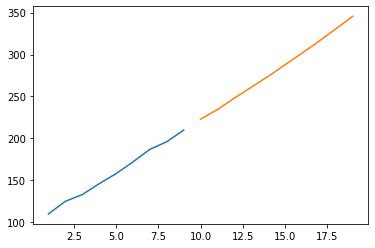

In [23]:
plt.plot(day_new,timeseries_data)
plt.plot(day_pred,lst_output)